## Step 1 – Set Up and Load Image Paths

In [6]:
import os
import shutil
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define the paths
RAW_DATA_PATH = "../data/raw"  # The folder where my original data is
CLEANED_DATA_PATH = "../data/processed"  # Where I'll save resized/clean images

# Just checking which categories I have
categories = sorted(os.listdir(RAW_DATA_PATH))
print("Found categories:", categories)

Found categories: ['Plant_leave_diseases_dataset_without_augmentation']


In [8]:
RAW_DATA_PATH = "../data/raw/Plant_leave_diseases_dataset_without_augmentation"

In [9]:
categories = sorted(os.listdir(RAW_DATA_PATH))
print("Found categories:", categories)
print("Total classes:", len(categories))

Found categories: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomat

## Step 2 – Resize & Copy All Images to Clean Folder

In [10]:
import os
import shutil
from PIL import Image

# Step 2: Resize and copy images to data/processed/

# Define where to save cleaned images
CLEANED_DATA_PATH = "../data/processed"
IMG_SIZE = (224, 224)

# 1. Clear any existing processed folder (start fresh)
if os.path.exists(CLEANED_DATA_PATH):
    shutil.rmtree(CLEANED_DATA_PATH)
os.makedirs(CLEANED_DATA_PATH)

# 2. Go inside each category and resize images
for category in categories:
    input_folder = os.path.join(RAW_DATA_PATH, category)
    output_folder = os.path.join(CLEANED_DATA_PATH, category)
    os.makedirs(output_folder, exist_ok=True)

    for img_file in os.listdir(input_folder):
        img_path = os.path.join(input_folder, img_file)

        try:
            # Load the image and resize it
            img = Image.open(img_path).convert("RGB")
            img = img.resize(IMG_SIZE)

            # Save it into the cleaned path
            save_path = os.path.join(output_folder, img_file)
            img.save(save_path)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


## Step 3 – Preview Cleaned Images

Category: Peach___Bacterial_spot


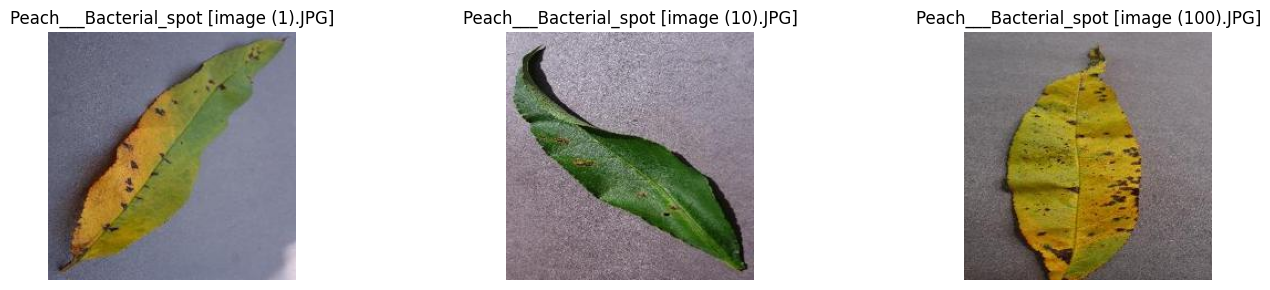

Category: Raspberry___healthy


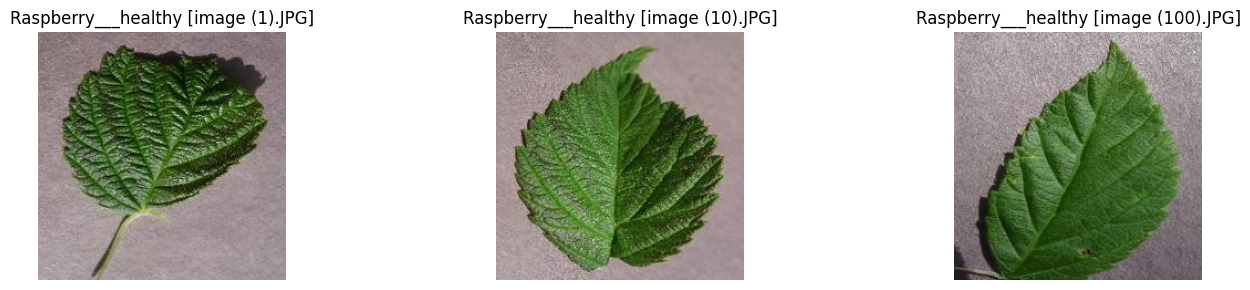

Category: Tomato___Target_Spot


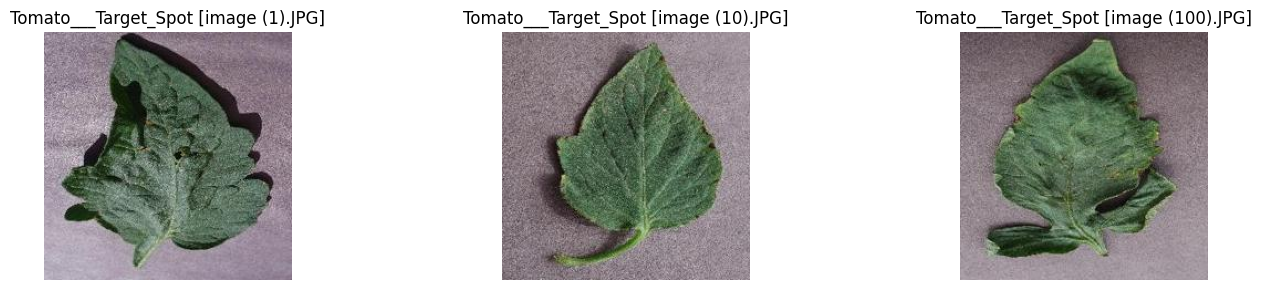

In [27]:
import matplotlib.pyplot as plt

# Pick a few categories to preview
preview_categories = random.sample(categories, 3)

# For each category, show 3 images
for cat in preview_categories:
    cat_path = os.path.join(CLEANED_DATA_PATH, cat)
    images = os.listdir(cat_path)[:3]

    print(f"Category: {cat}")
    plt.figure(figsize=(15, 3))
    
    for i, img_name in enumerate(images):
        img_path = os.path.join(cat_path, img_name)
        img = Image.open(img_path)
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{cat} [{img_name}]")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

## Step 4 – Train-Test Split with Balanced Distribution

In [28]:
from sklearn.model_selection import train_test_split

# Defining split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Seting seed for reproducibility
random.seed(42)

# Defining the new output split folders
SPLIT_PATH = "../data/split"

for category in categories:
    src_folder = os.path.join(CLEANED_DATA_PATH, category)
    images = os.listdir(src_folder)
    
    # Shuffle before splitting
    random.shuffle(images)

    # Spliting into train, val, test
    train_files, temp_files = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

    print(f"{category}: Total={len(images)}, Train={len(train_files)}, Val={len(val_files)}, Test={len(test_files)}")

    # Creating destination folders and copy
    for split_type, file_list in [("train", train_files), ("val", val_files), ("test", test_files)]:
        split_cat_folder = os.path.join(SPLIT_PATH, split_type, category)
        os.makedirs(split_cat_folder, exist_ok=True)
        
        for fname in file_list:
            src = os.path.join(src_folder, fname)
            dst = os.path.join(split_cat_folder, fname)
            shutil.copy2(src, dst)


Apple___Apple_scab: Total=630, Train=440, Val=95, Test=95
Apple___Black_rot: Total=621, Train=434, Val=93, Test=94
Apple___Cedar_apple_rust: Total=275, Train=192, Val=41, Test=42
Apple___healthy: Total=1645, Train=1151, Val=247, Test=247
Background_without_leaves: Total=1143, Train=800, Val=171, Test=172
Blueberry___healthy: Total=1502, Train=1051, Val=225, Test=226
Cherry___Powdery_mildew: Total=1052, Train=736, Val=158, Test=158
Cherry___healthy: Total=854, Train=597, Val=128, Test=129
Corn___Cercospora_leaf_spot Gray_leaf_spot: Total=513, Train=359, Val=77, Test=77
Corn___Common_rust: Total=1192, Train=834, Val=179, Test=179
Corn___Northern_Leaf_Blight: Total=985, Train=689, Val=148, Test=148
Corn___healthy: Total=1162, Train=813, Val=174, Test=175
Grape___Black_rot: Total=1180, Train=825, Val=177, Test=178
Grape___Esca_(Black_Measles): Total=1383, Train=968, Val=207, Test=208
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): Total=1076, Train=753, Val=161, Test=162
Grape___healthy: Total

## Step 5 – Sample Visualization from Split Folders

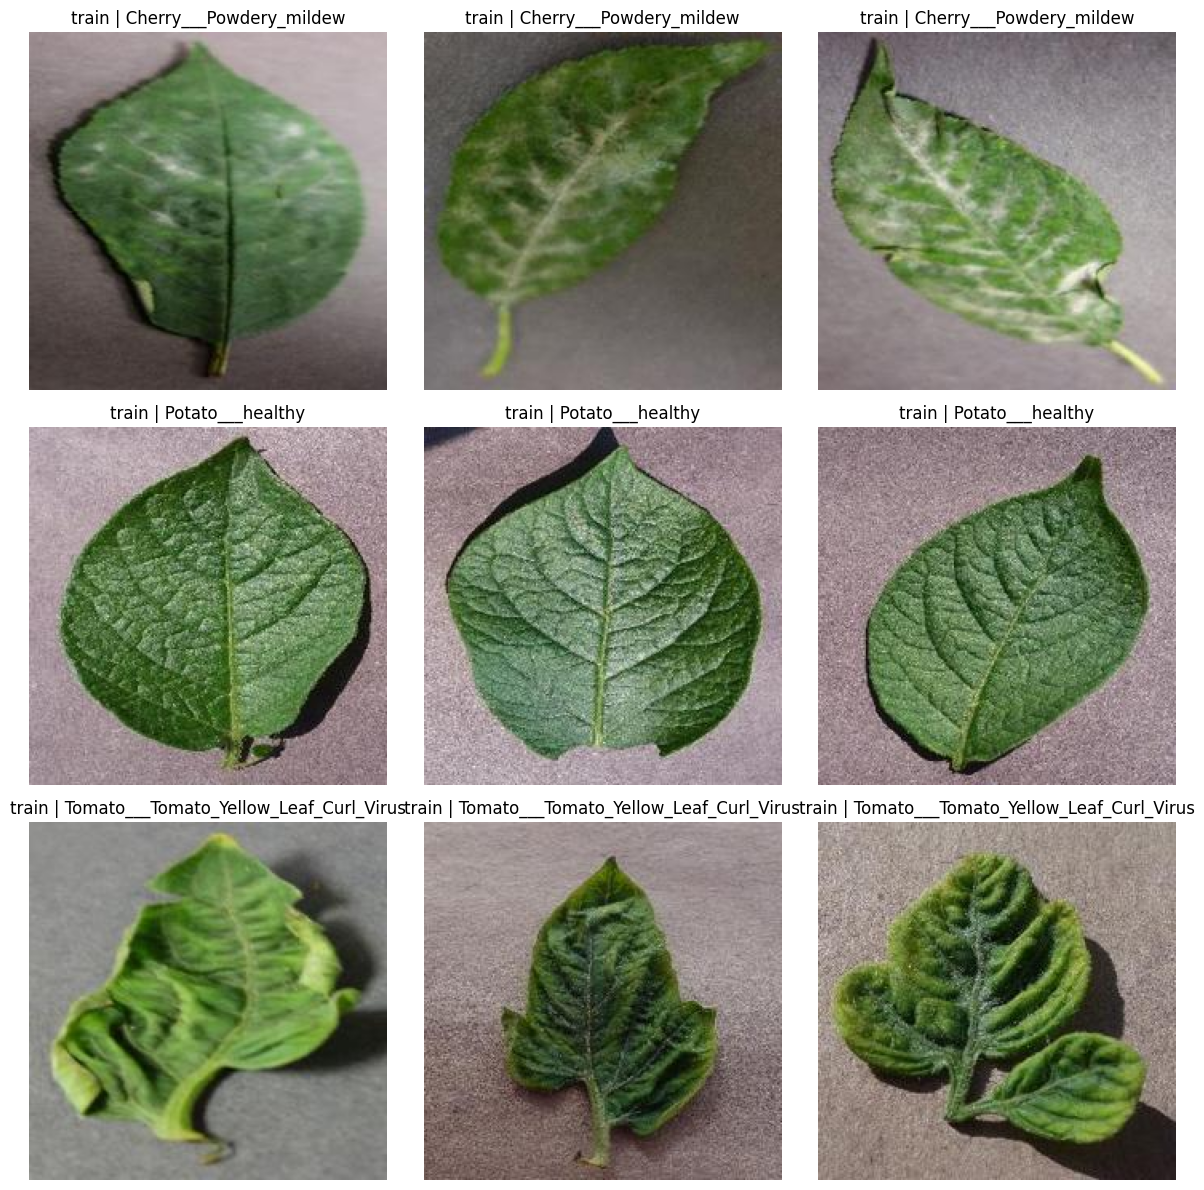

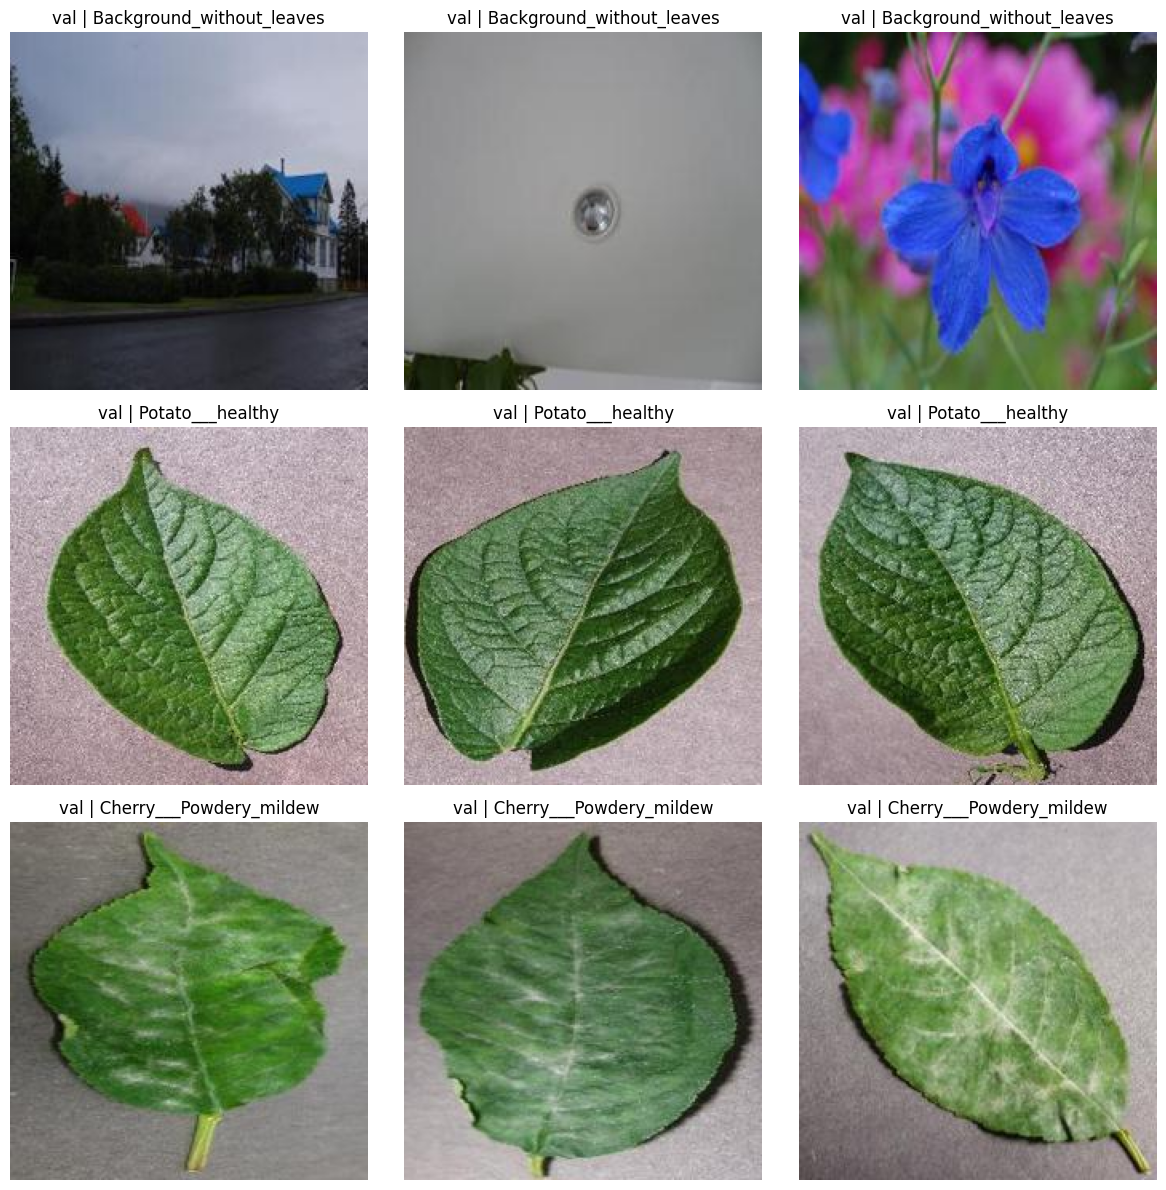

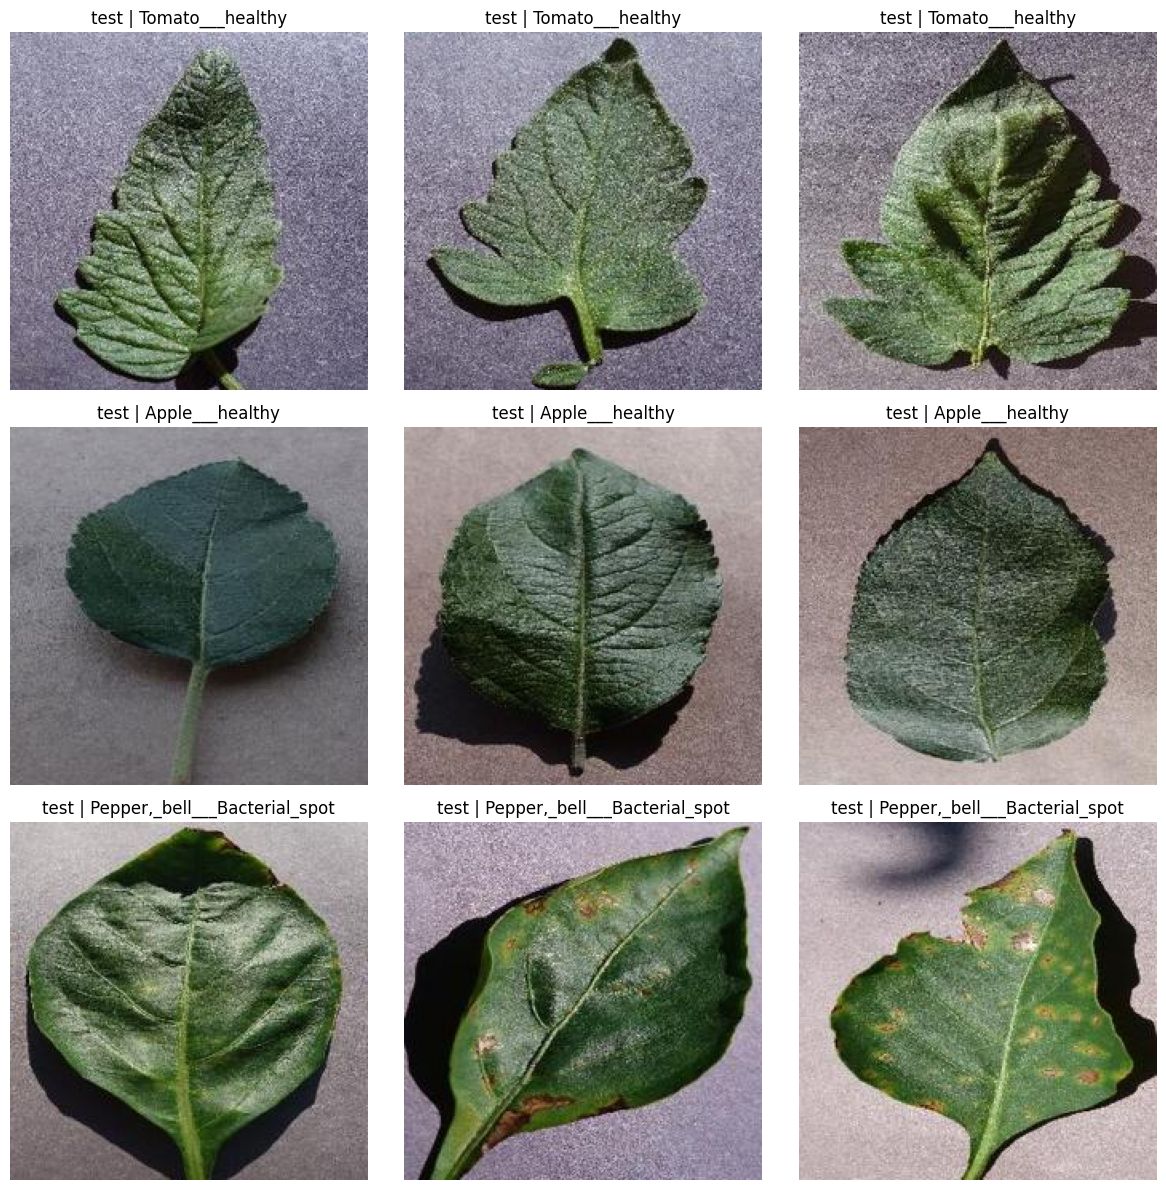

In [29]:
import matplotlib.pyplot as plt

# Helper function to preview a few images
def show_sample_images(base_path, split_name, num_classes=3, samples_per_class=3):
    class_folders = sorted(os.listdir(os.path.join(base_path, split_name)))
    selected_classes = random.sample(class_folders, min(num_classes, len(class_folders)))

    fig, axs = plt.subplots(num_classes, samples_per_class, figsize=(12, 4 * num_classes))
    
    for row, cls in enumerate(selected_classes):
        cls_folder = os.path.join(base_path, split_name, cls)
        image_files = os.listdir(cls_folder)
        selected_imgs = random.sample(image_files, min(samples_per_class, len(image_files)))

        for col, img_file in enumerate(selected_imgs):
            img_path = os.path.join(cls_folder, img_file)
            img = Image.open(img_path)
            axs[row, col].imshow(img)
            axs[row, col].set_title(f"{split_name} | {cls}")
            axs[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Show samples from each split
show_sample_images(SPLIT_PATH, "train")
show_sample_images(SPLIT_PATH, "val")
show_sample_images(SPLIT_PATH, "test")

## ~Preprocessing Completed

All raw plant images have been:
- Resized to 128×128
- Cleaned and saved to `../data/processed`
- Split into train/val/test and saved to `../data/split`
- Visually verified from each class/split

Now I’m ready to build and train my CNN model.
